In [36]:
using Statistics
using StatsBase
using Distributions
using MultivariateStats
using DelimitedFiles
using GaussianMixtures
using Plots; gr();

In [5]:
prior, h = readdlm("../data/base/bsr_ignmajors_1.csv", ',', header=true);

In [8]:
comp = prior[:,2:11]
comph = h[2:11]

10-element Vector{AbstractString}:
 "SiO2"
 "TiO2"
 "Al2O3"
 "FeO"
 "MgO"
 "CaO"
 "Na2O"
 "K2O"
 "H2O_Total"
 "CO2"

In [14]:
pca_model = fit(PCA, comp')

PCA(indim = 10, outdim = 7, principalratio = 0.9937846284190507)

In [15]:
components = transform(pca_model, comp')

7×100000 Matrix{Float64}:
 -5.06376   -1.05936   -7.81122   …   4.19949    5.70207   -1.00369
 -1.54043   -2.61236   -0.755846     -2.53788   -3.79022   -1.9621
 -3.06125   -2.24085   -5.23892       1.00303    4.16762    2.53116
 -1.27575   -2.01837   -1.05522       0.113536  -0.576552  -0.591744
  0.710295   0.628242   1.19381      -0.317986  -0.438458  -1.04855
 -0.384578   1.28281    0.94237   …  -0.244966   1.41624   -0.947725
  0.179879  -0.705827  -0.16676       1.37651    1.446      1.52538

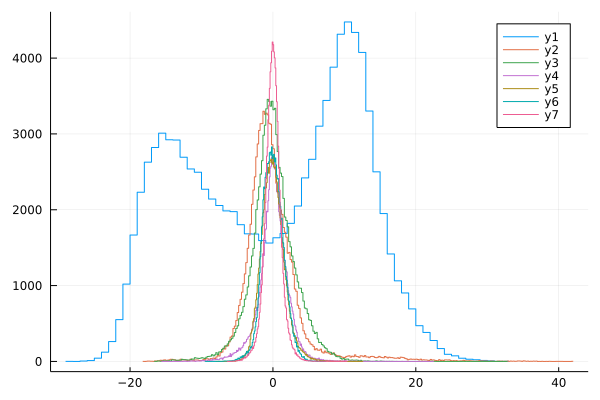

In [34]:
stephist(components[1,:])
for c in 2:7
    stephist!(components[c,:])
end 
stephist!()

In [20]:
principalvars(pca_model)./tvar(pca_model)

7-element Vector{Float64}:
 0.7732729076521977
 0.10728873799060282
 0.05372706829938338
 0.02584670539184566
 0.014434302857106231
 0.011822741882707887
 0.007392164345206995

In [31]:
printable = round.(projection(pca_model)', digits=3)
for row in 1:size(printable,1)
    for col in printable[row,:]
        print(col)
        print(" & ")
    end
    println(" \\\\")
end

-0.827 & 0.04 & -0.016 & 0.331 & 0.335 & 0.281 & -0.048 & -0.107 & 0.007 & 0.004 &  \\
0.245 & -0.05 & -0.559 & -0.061 & 0.758 & -0.168 & -0.135 & -0.022 & -0.006 & -0.002 &  \\
0.103 & 0.067 & -0.379 & 0.809 & -0.31 & -0.297 & -0.018 & 0.049 & -0.018 & -0.005 &  \\
0.278 & 0.001 & -0.314 & 0.055 & -0.18 & 0.791 & -0.148 & -0.36 & -0.108 & -0.016 &  \\
-0.189 & 0.065 & -0.406 & -0.24 & -0.244 & 0.156 & -0.264 & 0.605 & 0.463 & 0.054 &  \\
-0.076 & 0.031 & -0.197 & -0.117 & -0.095 & -0.141 & 0.417 & -0.54 & 0.667 & 0.048 &  \\
-0.153 & 0.233 & -0.376 & -0.203 & -0.098 & 0.042 & 0.669 & 0.178 & -0.467 & 0.176 &  \\


# Fit 10-D, 2 peak Gaussian Mixture model 

In [59]:
gm_model = MixtureModel(GMM(2, comp))

K-means converged with 3 iterations (objv = 136931.47220649855)


┌ Info: Initializing GMM, 2 Gaussians diag covariance 10 dimensions using 100000 data points
└ @ GaussianMixtures /Users/f0043n9/.julia/packages/GaussianMixtures/LQCWm/src/train.jl:79
┌ Info: K-means with 2000 data points using 3 iterations
│ 90.9 data points per parameter
└ @ GaussianMixtures /Users/f0043n9/.julia/packages/GaussianMixtures/LQCWm/src/train.jl:140


MixtureModel{DiagNormal}(K = 2)
components[1] (prior = 0.5747): DiagNormal(
dim: 10
μ: [51.27471374666775, 1.3444967928261895, 14.567517269420838, 10.195365679998943, 7.685623148980128, 8.66190463161407, 2.741034552879304, 1.0751990459533705, 1.8281383502988893, 0.62600678546509]
Σ: [20.797795373031928 0.0 … 0.0 0.0; 0.0 0.9054595483678336 … 0.0 0.0; … ; 0.0 0.0 … 1.9063718081560748 0.0; 0.0 0.0 … 0.0 0.726111896203368]
)

components[2] (prior = 0.4253): DiagNormal(
dim: 10
μ: [68.69285327034723, 0.42001603516346053, 14.616626094711204, 3.2549426811382673, 1.0280022654356407, 2.2656567246168318, 3.7789279383180654, 3.5978902566975206, 1.781853919913047, 0.5632308114040802]
Σ: [27.174609641806455 0.0 … 0.0 0.0; 0.0 0.07000727501731444 … 0.0 0.0; … ; 0.0 0.0 … 1.840900771788219 0.0; 0.0 0.0 … 0.0 0.5705880465677771]
)



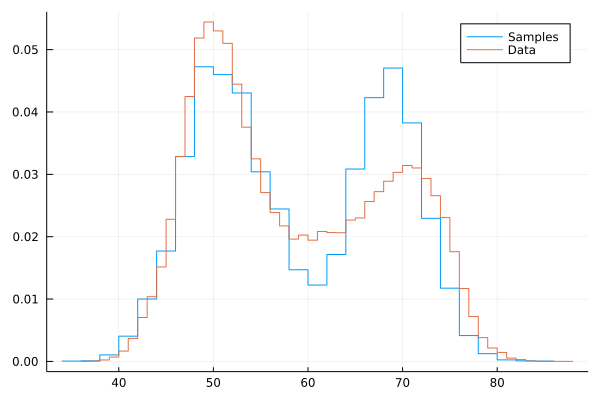

In [60]:
sampled_comps = rand(gm_model,10000)
sampled_comps = (sampled_comps ./ sum(sampled_comps,dims=1)).*100

stephist(sampled_comps[1,:],normalize=:pdf, label="Samples")
stephist!(comp[:,1], normalize=:pdf, label="Data")

In [50]:
sum(sampled_comps,dims=2)

10×1 Matrix{Float64}:
 588342.5060851849
   9390.884917505864
 145867.97145032327
  71444.79222496091
  47944.56813723532
  58823.40051991588
  31799.33842763027
  21756.44157134956
  18165.875687502623
   6020.222031726727